*** 
This code example is a Jupyter notebook with [Script of Scripts](https://vatlab.github.io/sos-docs/) (SoS) workflow. It reproduces interactive figures for the paper by first author **Ardi Tampuu** and last author **Raul Vicente**. 


The calculations are written using *Python 2.7* (from this fetched from [repo](https://github.com/NeuroCSUT/RatGPS)), and the interactive figures are written in *Python 3.6* with the ploting library [Plotly](https://plotly.com/).  

# Figure 6:

**(a)** Place field of an example neuron. **(b)** Sensitivity field—absolute values of gradients in different locations for the same neuron. **(c)** Normalized sensitivity as a function of normalized activity across neurons.

https://doi.org/10.1371/journal.pcbi.1006822.g006

## Python 2.7
***
Figure with calculations in Python 2.7 Matplotlib: 

Original data: (5404, 63) (5404, 2)
minX/maxX/meanX/stdX/miny/maxy: 0.0 59.0 0.7402482581979251 2.3591926816354136 4.39033 107.044


<Figure size 1224x1728 with 0 Axes>

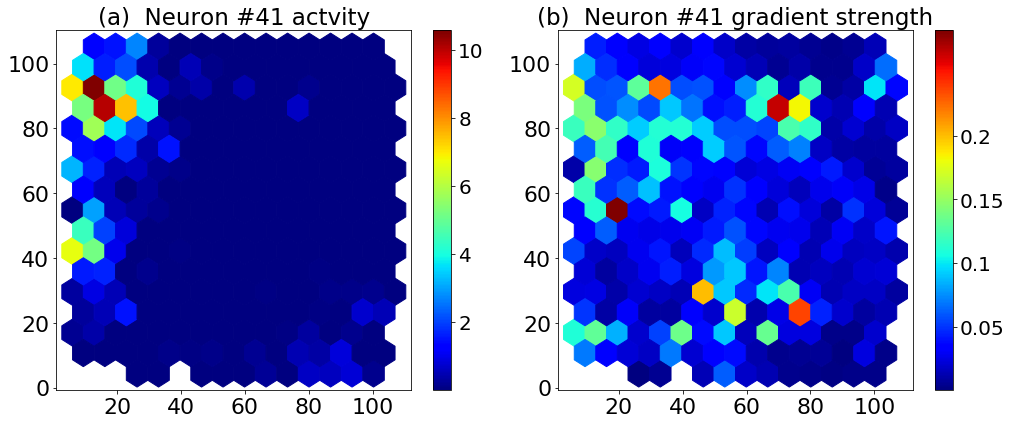

In [1]:
%use Python2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
# mpl.style.use('classic')
from ratdata import load_data
from scipy.stats import binned_statistic


X, y = load_data('data/R2192_1x1400_at35_step200_bin100-RAW_feat.dat', 'data/R2192_1x1400_at35_step200_bin100-RAW_pos.dat')
data = np.load('R2192_models/grads_R2192_1x1400_v1.npz')
#grads = data['grads'][:,:,:63]
grads = data['grads'][:,:,:63]
#onehot_grads = data['grads'][:,:,63:]
targets = data['targets']

new_tgts=0
all_grads=[]
# For the article, this was actually done for 10 CV-runs, 
# but to limit repo size we have included only one set of grad to the repository
for i in range(1,2):
    data = np.load("R2192_models/grads_R2192_1x1400_v"+str(i)+".npz")
    grads = data['grads'][:,:,:63]
    if i>1:
        assert(np.all(new_tgts==data["targets"]))
    new_tgts = data["targets"]
    all_grads.append(grads)

raw_mean_grads = np.mean(all_grads, axis=0)

mean_grads = np.mean(np.abs(all_grads), axis=0)

neuron_grads = np.mean(mean_grads, axis=(0,1))

# activity of the most sensitive neurons
plt.figure(figsize=(17,24))

grad_avg_over_time=np.mean(mean_grads[:,97:,:], axis=1)
used_data = []
for i in range(len(y)):
    if y[i,:].tolist() in targets.tolist():
        used_data.append(X[i,:])
    else:
        pass
used_data=np.array(used_data)

feature_importance = neuron_grads
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5



plt.figure(figsize=(14.3,6))
for i in [2]:
    plt.subplot(1,2,2)
    collection_grad = plt.hexbin(targets[...,0], targets[...,1], grad_avg_over_time[...,sorted_idx[-i]], gridsize = 15, cmap='jet')
    #plt.hexbin(targets[...,0], targets[...,1], mean_grads[...,99,sorted_idx[-i]], gridsize = 10)
    cbar = plt.colorbar(ticks=[0.05,0.1,0.15,0.2])
    cbar.ax.set_yticklabels([0.05,0.1,0.15,0.2],fontsize=20)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.title("(b)  Neuron #%d gradient strength" % sorted_idx[-i], fontsize=23)

    plt.subplot(1,2,1)
    collection_loc = plt.hexbin(targets[...,0], targets[...,1], used_data[...,sorted_idx[-i]], gridsize = 15, cmap='jet')
    #plt.hexbin(targets[...,0], targets[...,1], mean_grads[...,99,sorted_idx[-i]], gridsize = 10)
    cbar = plt.colorbar( ticks=[2,4,6,8,10])
    cbar.ax.set_yticklabels([2,4,6,8,10],fontsize=20)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    plt.title("(a)  Neuron #%d actvity" % sorted_idx[-i],fontsize=23)
    
    
    ll= collection_loc.get_array()
    gg= collection_grad.get_array()
    

    max_activity= np.max(X[...,sorted_idx[-i]])
    filtered_activity = X[...,sorted_idx[-i]].copy()
    filtered_activity[np.where(filtered_activity<2)]=0
    
plt.tight_layout()
plt.show()

<Figure size 1008x19800 with 0 Axes>

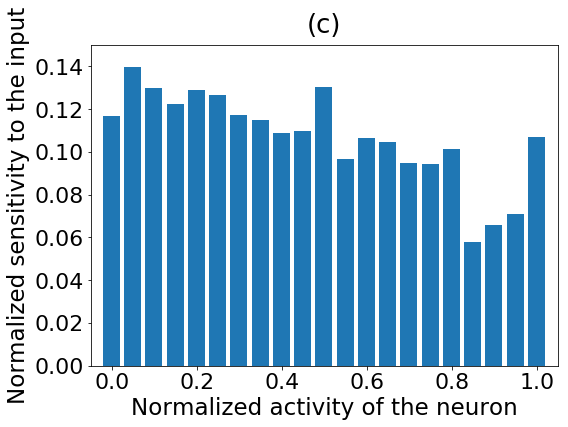

In [3]:
%use Python2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
# mpl.style.use('classic')
from ratdata import load_data
from scipy.stats import binned_statistic

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

# activity of the most sensitive neurons
plt.figure(figsize=(14,275))

grad_avg_over_time=np.mean(mean_grads[:,95:,:], axis=1)
#grad_avg_over_time=mean_grads[:,99,:]

used_data = []
for i in range(len(y)):
    if y[i,:].tolist() in targets.tolist():
        used_data.append(X[i,:])
    else:
        pass
used_data=np.array(used_data)

normalized_activity=np.empty_like(used_data)
normalized_grad=np.empty_like(grad_avg_over_time)

activity_hexes=[]
grad_hexes = []

for i in xrange(63):
    #plt.subplot(63,3,i*3+2)
    collection_grad = plt.hexbin(targets[...,0], targets[...,1], grad_avg_over_time[...,i], gridsize = 10)
    #plt.colorbar()
    #plt.title("Neuron #%d gradient field" % i)

    #plt.subplot(63,3,i*3+1)
    collection_loc = plt.hexbin(targets[...,0], targets[...,1], used_data[...,i], gridsize = 10)
    #plt.colorbar()
    #plt.title("Neuron #%d place field" % i)
    
    ll= collection_loc.get_array()
    gg= collection_grad.get_array()
    
    activity_hexes.append(ll/np.percentile(ll,99))
    grad_hexes.append(gg/np.percentile(gg,99))
    
    #print "axtivity max, 99th percentile  ", np.max(ll), np.percentile(ll,99)
    #print "grad max, 99th percentile  ", np.max(gg), np.percentile(gg,99)
    normalized_activity[...,i] = used_data[...,i]/np.percentile(used_data[...,i],99)
    #print "axtivity max, 99th percentile  ", np.max(used_data[...,i]), np.percentile(used_data[...,i],99)
    normalized_grad[...,i] = grad_avg_over_time[...,i]/np.percentile(grad_avg_over_time[...,i],99)


    #plt.subplot(63,3,i*3+3)
    #averages,edges,ids = binned_statistic(used_data[...,i]/np.max(used_data[...,i]),grad_avg_over_time[...,i],statistic='mean', bins=np.arange(0.0,1,0.1))
    #plt.bar(edges[:-1],averages,width=0.05)
plt.clf()


plt.figure(figsize=(8,6))
averages,edges,ids = binned_statistic(np.ravel(normalized_activity[...,:]),np.ravel(normalized_grad[...,:]),statistic='mean', bins=np.arange(-0.001,1.05,0.05))
plt.bar(edges[:-1],averages,width=0.04,align='center', color = tableau20[0])
plt.title("ALL cells, both activity and grads normalized by 99th percentile. ")
plt.xlabel("Normalized activity of the neuron", fontsize=23)
plt.ylabel("Normalized sensitivity to the input", fontsize=23)
plt.title("(c)",fontsize=26,y=1.02)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim([-0.05,1.05])
plt.ylim([-0.0,0.15])
plt.tight_layout()
plt.show()
#plt.savefig("grad_f_activity.png")

## Python 3.7
*** 
Figures with calculations in Python 3.7: 

### (a) Neuron #41 activity
Figure 6.a, Plotly 

### (b) Neuron #41 gradient strength 
Figure 6.b, Plotly

### (c) Sensitivity / Activity on neuron 
Figure 6.c, Plotly